## Project Id: PRCP-1000-PortugueseBank

### Data Analysis Report
- The objective of this analysis is to understand customer behavior and identify key factors influencing term deposit subscription in the Portuguese Bank marketing campaigns.
- The dataset consists of customer demographic details, contact information, campaign-related variables, and economic indicators, with the target variable indicating whether a client subscribed to a term deposit.
- Initial data quality checks revealed the presence of “unknown” values in several categorical features and right-skewed distributions in campaign-related numerical variables, while no significant duplication issues were observed.
- Exploratory data analysis shows that the majority of customers did not subscribe to the term deposit, indicating class imbalance, with most clients falling in the 30–50 age range.
- Customers contacted via cellular channels demonstrate higher subscription rates compared to telephone contacts, and fewer campaign interactions generally lead to better conversion outcomes.
- Clients with successful outcomes in previous marketing campaigns are significantly more likely to subscribe in the current campaign.
- Correlation analysis highlights strong relationships among certain economic indicators, while most customer attributes show low multicollinearity, making them suitable for predictive modeling.
- Data preprocessing involved handling missing and “unknown” values, encoding categorical variables, scaling numerical features, and addressing potential data leakage by carefully evaluating features such as call duration.
- Business insights from the analysis suggest prioritizing older customers, leveraging cellular-based outreach, limiting excessive follow-ups, and using predictive models to target high-probability customers to improve campaign efficiency.

### Importing libraries and loading dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('C://Users//HP//OneDrive//Desktop//Datamites//Internship//Portuguese Bank//bank_additional_full.csv', sep=';')

### Exploratory Data Analysis 

#### Feature Description

Feature | Meaning |
|--------|---------|
| age | Age of the client |
| job | Type of job |
| marital | Marital status |
| education | Education level |
| default | Has credit in default? |
| housing | Has housing loan? |
| loan | Has personal loan? |
| contact | Contact communication type |
| month | Last contact month |
| day_of_week | Last contact day |
| duration | Duration of last call |
| campaign | No. of contacts during campaign |
| pdays | Days since last contact (-1 means never contacted) |
| previous | No. of contacts before this campaign |
| poutcome | Outcome of previous campaign |
| emp.var.rate | Employment variation rate |
| cons.price.idx | Consumer price index |
| cons.conf.idx | Consumer confidence index |
| euribor3m | Euribor 3-month rate |
| nr.employed | No. of employees |
| y | Target variable (deposit subscribed or not) |


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- The target variable, y, is categorical which needs to be converted to numeric classes.
- y being categorical we use various classification techniques to create the machine learning model.
- The null values are in the form of 'unknown' values. We either drop them or consider them as different class

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- Features with object datatype (including target variable) needs to be converted to numeric using various encoding techniques

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- Call duration varies widely with many extreme outliers, and it should be excluded from prediction due to data-leakage risk.
- Most customers are contacted only 1–3 times, but some receive excessive follow-ups, indicating aggressive marketing.
- Employment variation is mostly stable with slight positive trends.
- Consumer price index shows minimal fluctuation, reflecting stable inflation.
- Consumer confidence remains consistently negative, indicating economic pessimism.
- euribor3m rates show notable variation, affecting deposit attractiveness.

In [6]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


- Vast majority of clients have no credit default, showing low default history.
- Most clients have a housing loan, reflecting common long-term financial commitments.
- Most clients had no previous campaign outcome, suggesting many are first-time engagements.
- Majority class is 'no', confirming the dataset is highly imbalanced.

In [7]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [8]:
df.drop_duplicates(keep='last', inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(41176, 21)

In [11]:
data = []
for c in df.columns: 
    data.append([c, (df[c] == 'unknown').sum()])

nulls = pd.DataFrame(data, columns=['Features', 'unknown_count'])
print(nulls)

          Features  unknown_count
0              age              0
1              job            330
2          marital             80
3        education           1730
4          default           8596
5          housing            990
6             loan            990
7          contact              0
8            month              0
9      day_of_week              0
10        duration              0
11        campaign              0
12           pdays              0
13        previous              0
14        poutcome              0
15    emp.var.rate              0
16  cons.price.idx              0
17   cons.conf.idx              0
18       euribor3m              0
19     nr.employed              0
20               y              0


- The unknown_count here represents the null values.
- The unknown_count of job, marital, housing and loan is very minimum. We drop them.
- For the rest features we replace the null values by using respective statistical measures of central tendency.

#### Univariate Analysis

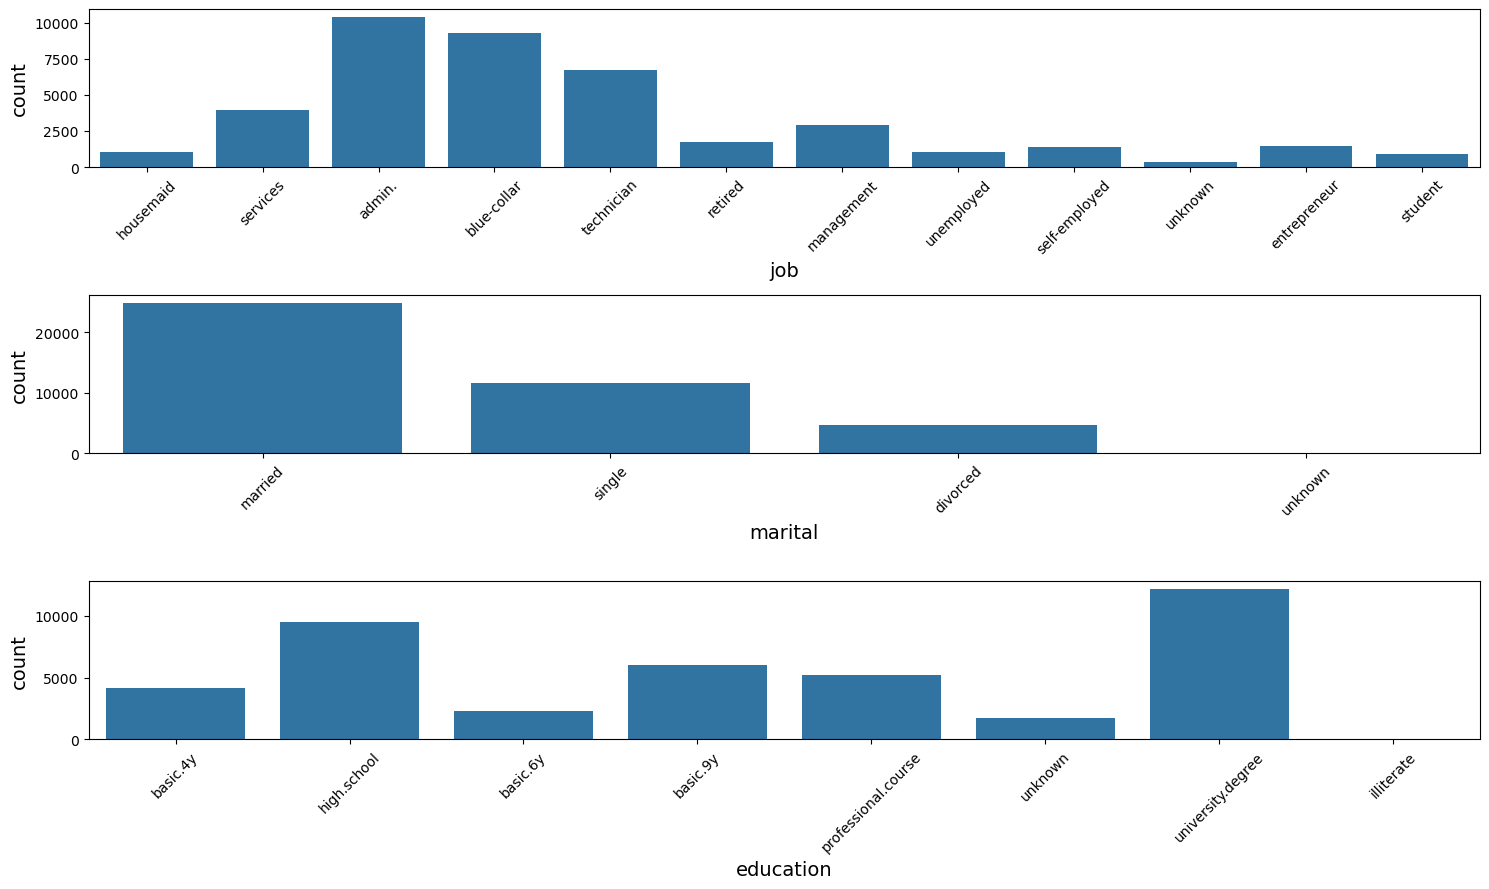

In [12]:
plt.figure(figsize=(15, 9))

cols = ['job', 'marital', 'education']

for i, c in enumerate(cols, 1):
    plt.subplot(3, 1, i)
    sns.countplot(x=c, data=df)
    plt.xlabel(c, fontsize=14)
    plt.ylabel('count', fontsize=14)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Administrative and blue-collar roles form the largest customer segments.
- Married customers dominate the dataset, followed by single individuals.
- Customers with a university degree are the most frequently contacted group.

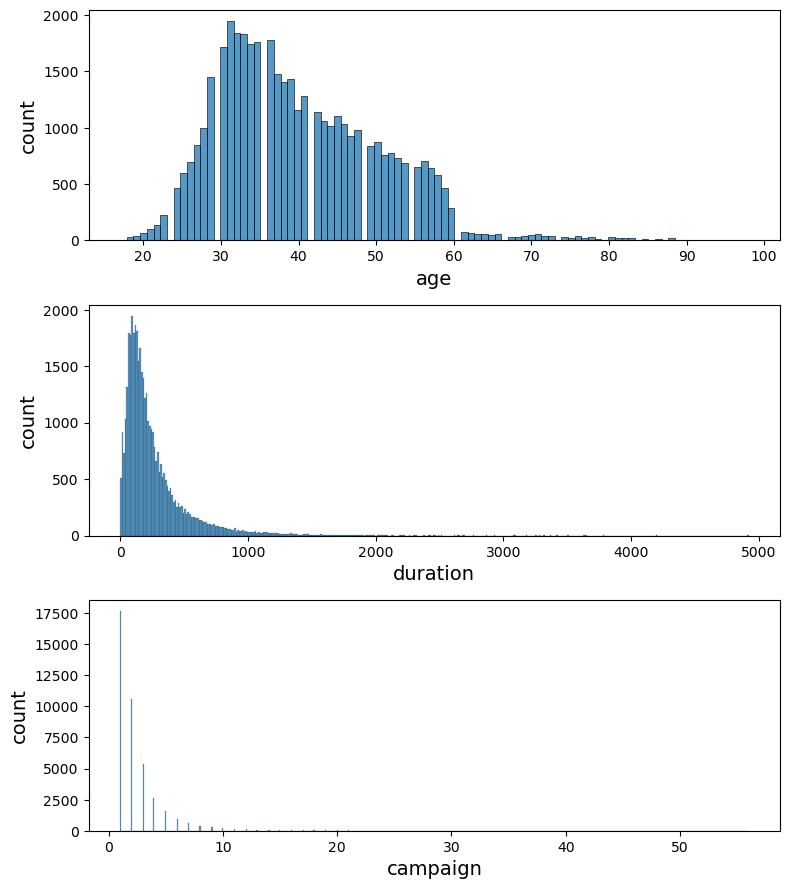

In [13]:
plt.figure(figsize=(8,9))

cols = ['age', 'duration', 'campaign']

for i, c in enumerate(cols, 1):
    plt.subplot(3, 1, i)
    sns.histplot(x=c, data=df)
    plt.xlabel(c, fontsize=14)
    plt.ylabel('count', fontsize=14)

plt.tight_layout()
plt.show()

- Customer ages are concentrated between 30–50 years, with very few elderly outliers.
- Call duration is highly right-skewed, with most calls being short and a few extremely long outliers.
- Most customers are contacted 1–3 times, while higher contact counts are rare and form a long tail.

#### Bivariate analysis

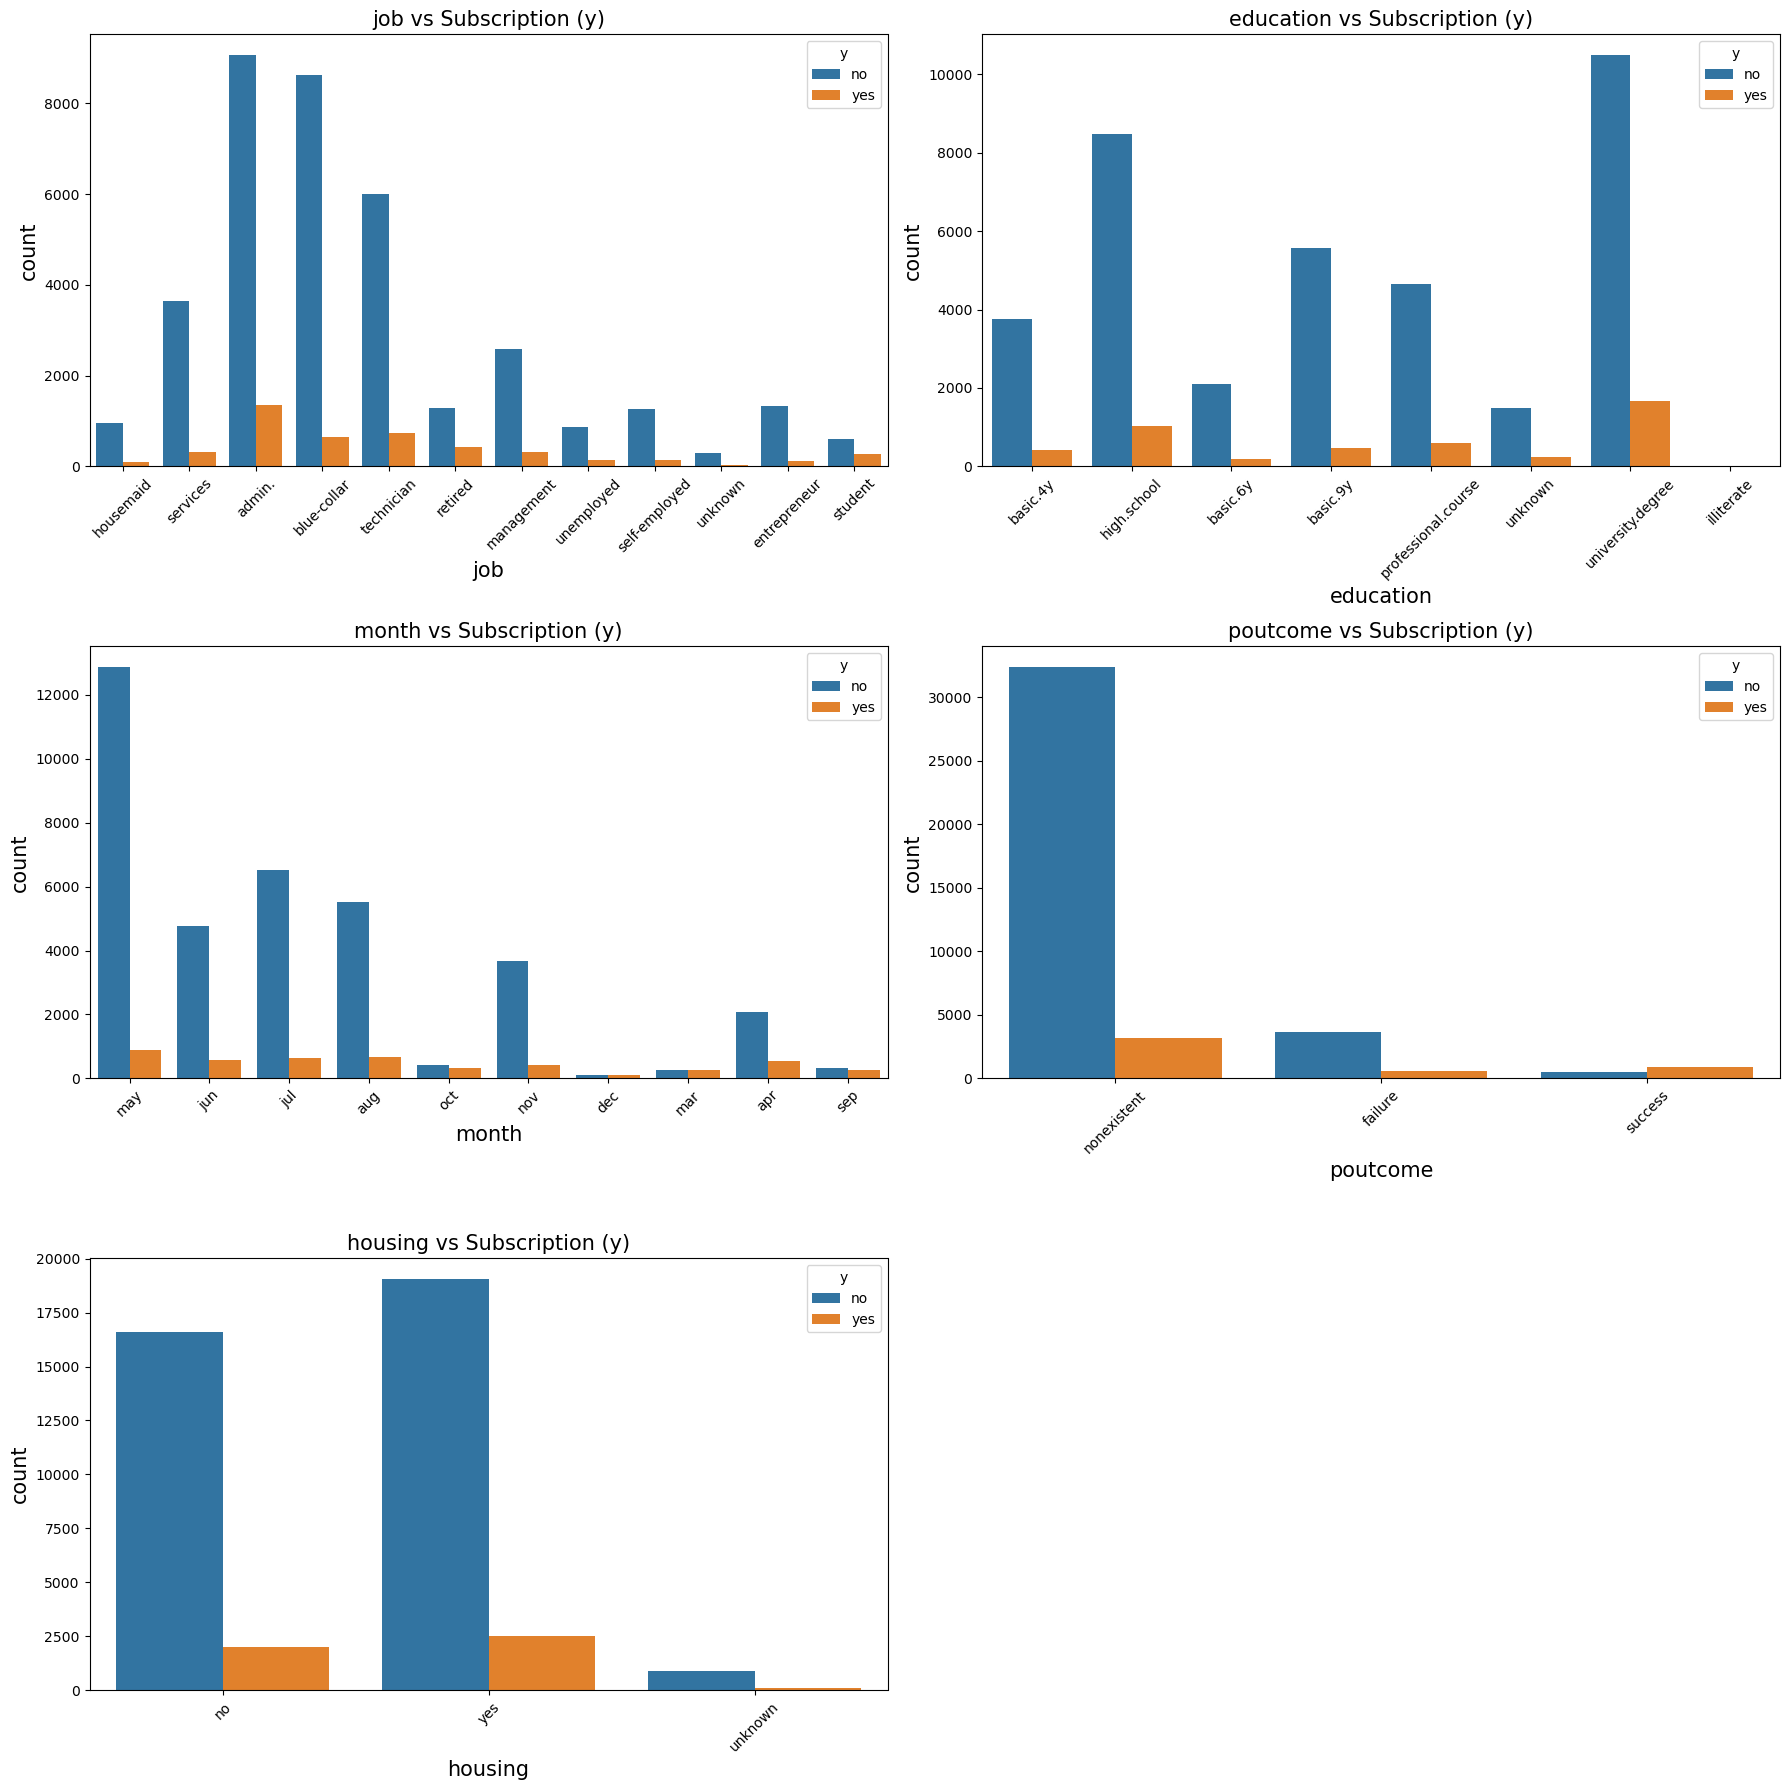

In [14]:
plt.figure(figsize=(18, 18))

cat_cols = ['job', 'education', 'month', 'poutcome', 'housing']

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'{col} vs Subscription (y)', fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Subscription likelihood varies by profession, with administrative and technical roles showing better response rates.
- Customers with higher education levels tend to subscribe more compared to lower education groups.
- Subscription rates differ across months, indicating strong seasonal effects in marketing campaigns.
- Longer call durations are strongly associated with higher subscription probability, though this feature causes data leakage.
- Customers with a previously successful campaign outcome show a significantly higher chance of subscribing.
- Customers without a housing loan are slightly more likely to subscribe to a term deposit.

### Data Preprocessing

#### Dropping the null values (unknown values)

In [15]:
df.drop(df[df['marital'] == 'unknown'].index, inplace=True)
df.drop(df[df['job'] == 'unknown'].index, inplace=True)
df.drop(df[df['housing'] == 'unknown'].index, inplace=True)
df.drop(df[df['loan'] == 'unknown'].index, inplace=True)

#### Replacing the null values (unknown values)

In [16]:
df['education'].value_counts()

education
university.degree      11817
high.school             9241
basic.9y                5856
professional.course     5097
basic.4y                4002
basic.6y                2203
unknown                 1557
illiterate                18
Name: count, dtype: int64

In [17]:
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])
df['default'] = df['default'].replace('unknown', 'unknown_category')

- In education feature, university.degree dominates all. So, by using mode() we replace the unknowns.
- For default feature, we make a new category called 'unknown_category' so that it doesn't cause huge data loss

In [18]:
df.shape

(39791, 21)

In [19]:
df.duplicated().sum()

0

In [20]:
df['pdays'] = df['pdays'].fillna(999)

#### Datatype Convertion

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [23]:
df['job'] = le.fit_transform(df['job'])

In [24]:
le.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'], dtype=object)

In [25]:
df['marital'] = df['marital'].map({'single':0, 'married':1, 'divorced':2})

In [26]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [27]:
df['education'] = df['education'].map({'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3,
                                      'high.school':4, 'professional.course':5, 'university.degree':6})

In [28]:
df['default'].unique()

array(['no', 'unknown_category', 'yes'], dtype=object)

In [29]:
df['default'] = df['default'].map({'no':0, 'yes':1, 'unknown_category':2})

In [30]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
df['housing'] = le.fit_transform(df['housing'])

In [32]:
df['loan'] = le.fit_transform(df['loan'])

In [33]:
df['contact'] = le.fit_transform(df['contact'])

In [34]:
df['month'] = le.fit_transform(df['month'])

In [35]:
df['day_of_week'] = le.fit_transform(df['day_of_week'])

In [36]:
df['poutcome'] = le.fit_transform(df['poutcome'])

In [37]:
df['y'] = df['y'].map({'no':0, 'yes':1})

#### Feature Selection

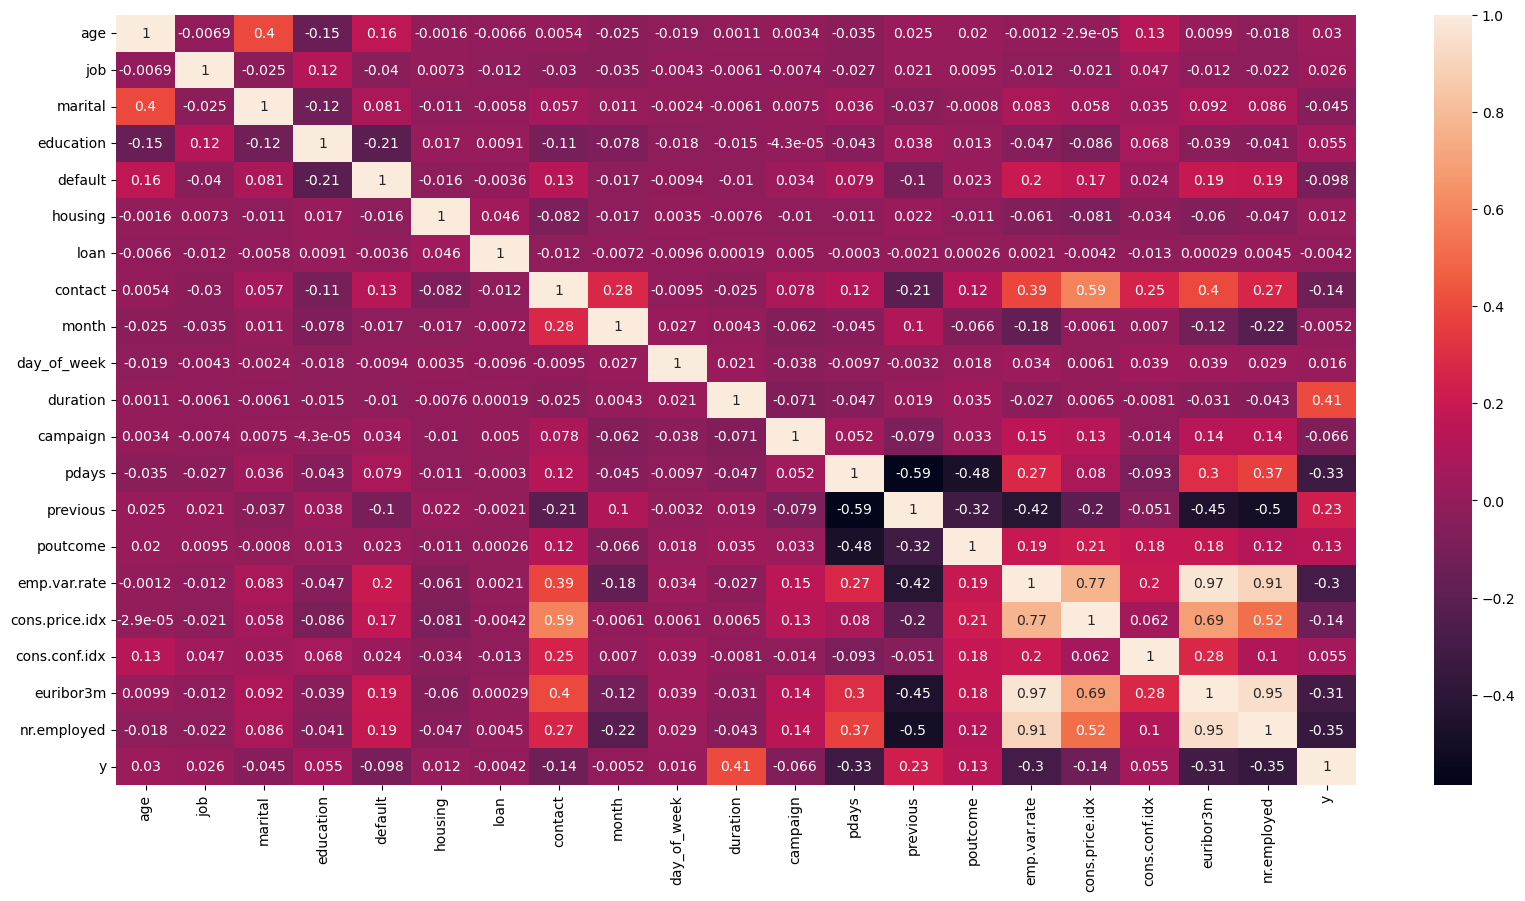

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Longer calls usually lead to better outcomes, but call duration is excluded from modeling since it’s only known after the call ends.
- Customers contacted recently are more likely to subscribe.
- Economic conditions clearly influence customer decisions, though many economic indicators convey similar information.
- Repeated calls show limited benefit, suggesting that too many contact attempts may not be effective.
- The timing of calls (month or weekday) has little impact on whether a customer subscribes.

In [39]:
df.drop(columns=['duration', 'emp.var.rate', 'cons.price.idx', 'nr.employed', 'month', 'day_of_week', 'contact'], inplace=True)

In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'cons.conf.idx',
       'euribor3m', 'y'],
      dtype='object')

### Data Visualization and Outlier Detection

#### Data visualization

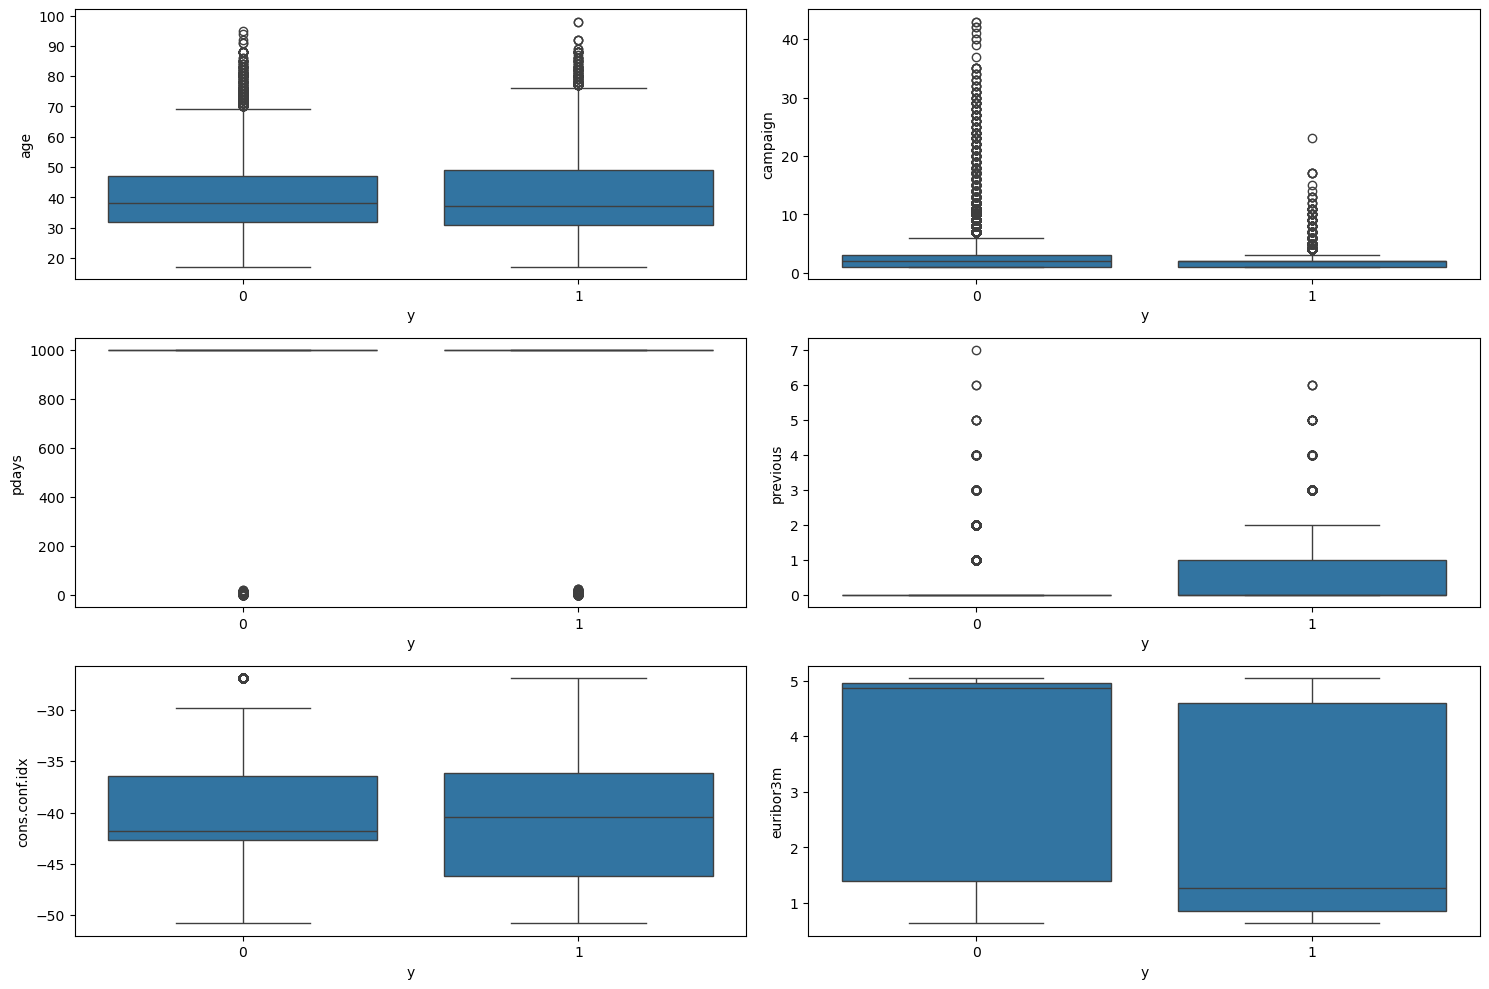

In [41]:
numeric = ['age', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'euribor3m']

plt.figure(figsize=(15, 10))
for i, c in enumerate(numeric, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='y', y=c, data=df)

plt.tight_layout()
plt.show()

- age: Subscribers tend to be slightly older compared to non-subscribers.
- campaign: Higher number of contacts is more common among non-subscribers, indicating diminishing returns.
- pdays: Lower pdays values are more associated with successful subscriptions.
- previous: Clients with prior contacts show a slightly higher likelihood of subscription.
- cons.conf.idx: Subscription outcomes vary modestly across confidence index levels.
- euribor3m: Lower interest rate periods show higher subscription likelihood.

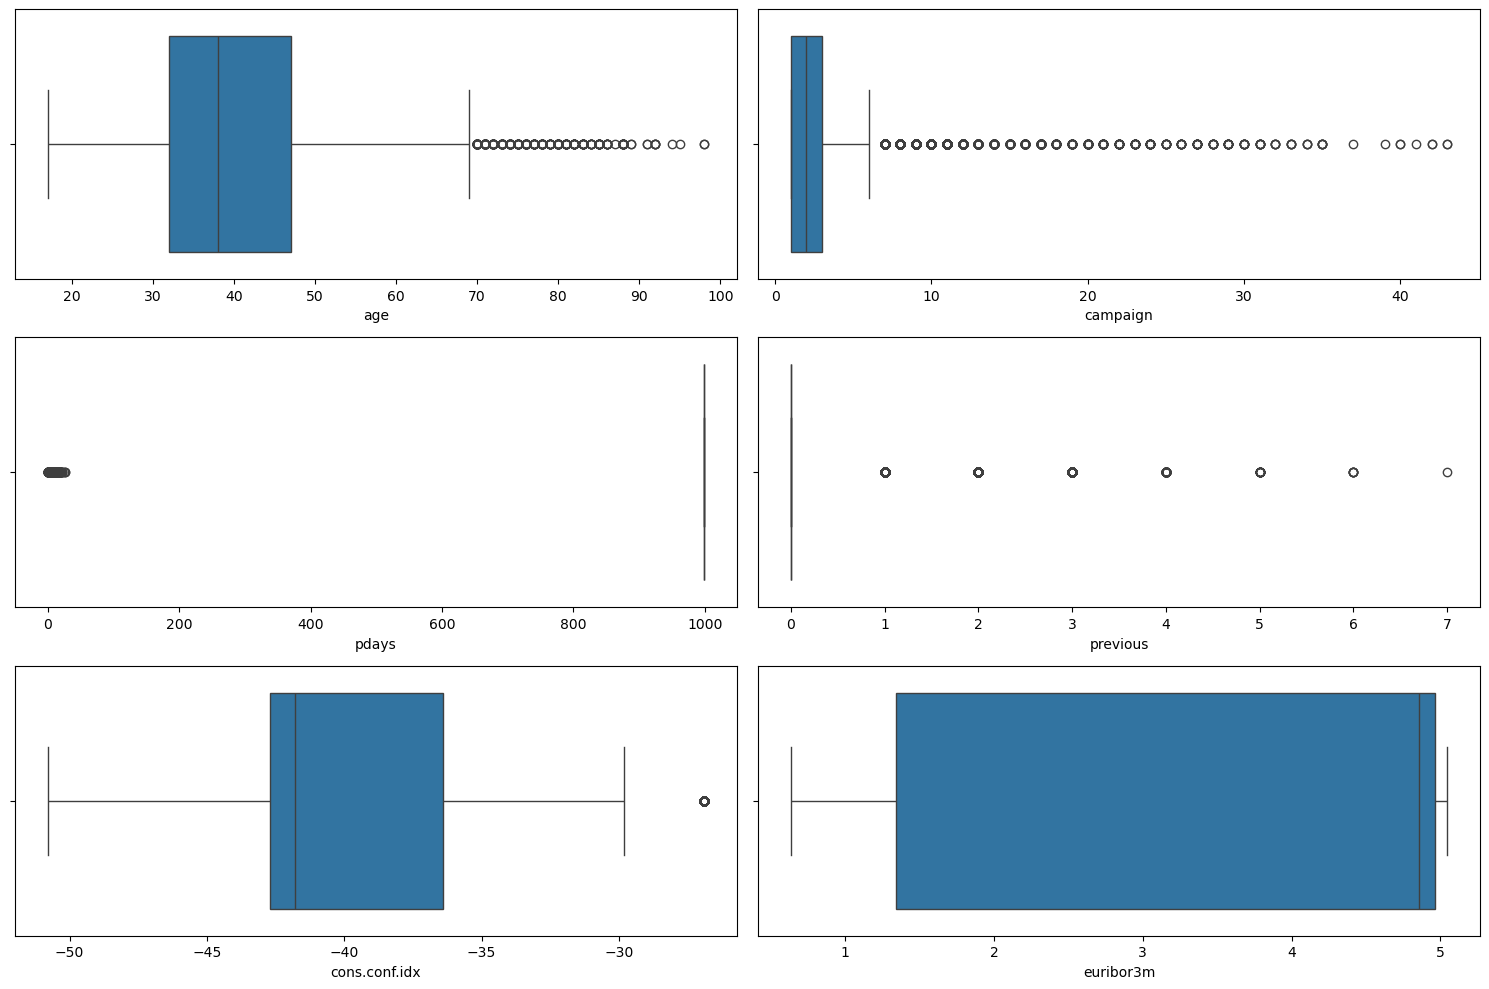

In [42]:
plt.figure(figsize=(15, 10))
for i, c in enumerate(numeric, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[c])

plt.tight_layout()
plt.show()

- age: Displays a few extreme high-age values, but most observations lie within a compact range.
- campaign: Shows numerous high-end outliers, indicating repeated contact attempts for a small subset of clients.
- pdays: Contains many extreme values, reflecting long gaps since last contact for certain clients.
- previous: Exhibits multiple outliers on the higher end, suggesting repeated prior interactions with few clients.
- cons.conf.idx: Limited number of outliers with a narrow interquartile range, indicating economic stability.
- euribor3m: Few extreme values with moderate spread, consistent with market-driven fluctuations.

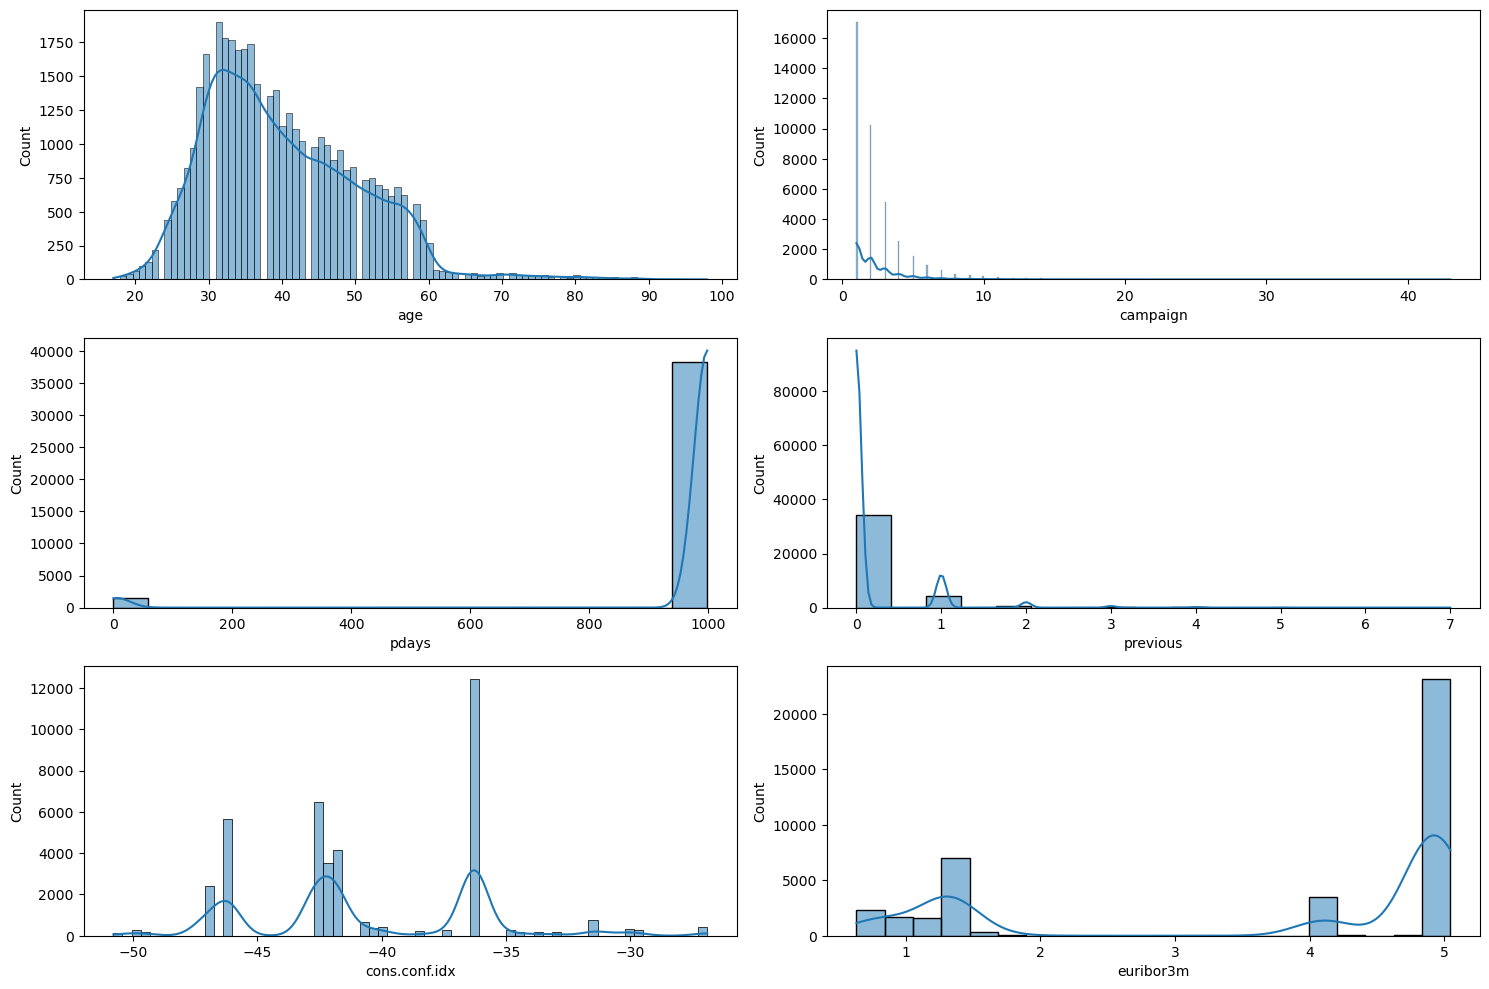

In [43]:
plt.figure(figsize=(15,10))
for i,c in enumerate(numeric, 1): 
    plt.subplot(3,2, i)
    sns.histplot(df[c], kde=True)

plt.tight_layout()
plt.show()

- age: Slight right skew with most customers concentrated in the working-age range and few older extremes.
- campaign: Heavily right-skewed, indicating most clients were contacted few times while a small number had very high contacts.
- pdays: Strong right skew with many low values, suggesting most clients were recently contacted or never contacted before.
- previous: Right-skewed with majority having zero or very few previous contacts.
- cons.conf.idx: Relatively stable distribution with limited spread, reflecting controlled economic conditions.
- euribor3m: Near-continuous distribution with mild skewness, showing variation across economic periods.

#### Outlier Detection

In [44]:
q1_age = df['age'].quantile(0.25)
q3_age = df['age'].quantile(0.75)
iqr_age = q3_age - q1_age
lb_age = q1_age - 1.5*iqr_age
ub_age = q3_age + 1.5*iqr_age
print('Lower bound:', lb_age, '\tUpper bound:',ub_age)
df[(df['age'] <= lb_age) | (df['age'] >= ub_age)]

Lower bound: 9.5 	Upper bound: 69.5


,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
27713,70,5,2,1,0,1,0,3,999,0,1,-50.0,1.811,1
27757,76,5,1,6,0,0,1,9,999,0,1,-50.0,1.757,0
27780,73,5,1,6,0,1,0,1,999,1,0,-50.0,1.687,0
27800,88,5,2,1,0,1,0,1,999,0,1,-50.0,1.663,0
27802,88,5,2,1,0,0,0,2,999,0,1,-50.0,1.663,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,5,2,1,2,1,1,4,3,1,2,-49.5,1.000,0
40996,81,5,1,1,0,1,0,1,999,2,0,-49.5,1.016,1
41004,80,5,1,5,0,1,0,1,999,1,0,-49.5,1.025,1
41183,73,5,1,5,0,1,0,1,999,0,1,-50.8,1.028,1


In [45]:
q1_campaign = df['campaign'].quantile(0.25)
q3_campaign = df['campaign'].quantile(0.75)
iqr_campaign = q3_campaign - q1_campaign
lb_campaign = q1_campaign - 1.5*iqr_age
ub_campaign = q3_campaign + 1.5*iqr_campaign
print('Lower bound:', lb_campaign, '\tUpper bound:',ub_campaign)
df[(df['campaign'] <= lb_campaign) | (df['age'] >= ub_campaign)]

Lower bound: -21.5 	Upper bound: 6.0


,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
0,56,3,1,1,0,0,0,1,999,0,1,-36.4,4.857,0
1,57,7,1,4,2,0,0,1,999,0,1,-36.4,4.857,0
2,37,7,1,4,0,1,0,1,999,0,1,-36.4,4.857,0
3,40,0,1,2,0,0,0,1,999,0,1,-36.4,4.857,0
4,56,7,1,4,0,0,1,1,999,0,1,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,1,999,0,1,-50.8,1.028,1
41184,46,1,1,5,0,0,0,1,999,0,1,-50.8,1.028,0
41185,56,5,1,6,0,1,0,2,999,0,1,-50.8,1.028,0
41186,44,9,1,5,0,0,0,1,999,0,1,-50.8,1.028,1


- Although IQR flagged most observations as outliers, campaign was retained due to its skewed but meaningful distribution.

In [46]:
q1_pdays = df['pdays'].quantile(0.25)
q3_pdays = df['pdays'].quantile(0.75)
iqr_pdays = q3_pdays - q1_pdays
lb_pdays = q1_pdays - 1.5*iqr_pdays
ub_pdays = q3_pdays + 1.5*iqr_pdays
print('Lower bound:', lb_pdays, '\tUpper bound:',ub_pdays)
df[(df['pdays'] <= lb_pdays) | (df['pdays'] >= ub_pdays)]

Lower bound: 999.0 	Upper bound: 999.0


,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
0,56,3,1,1,0,0,0,1,999,0,1,-36.4,4.857,0
1,57,7,1,4,2,0,0,1,999,0,1,-36.4,4.857,0
2,37,7,1,4,0,1,0,1,999,0,1,-36.4,4.857,0
3,40,0,1,2,0,0,0,1,999,0,1,-36.4,4.857,0
4,56,7,1,4,0,0,1,1,999,0,1,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,1,999,0,1,-50.8,1.028,1
41184,46,1,1,5,0,0,0,1,999,0,1,-50.8,1.028,0
41185,56,5,1,6,0,1,0,2,999,0,1,-50.8,1.028,0
41186,44,9,1,5,0,0,0,1,999,0,1,-50.8,1.028,1


In [47]:
q1_prev = df['previous'].quantile(0.25)
q3_prev = df['previous'].quantile(0.75)
iqr_prev = q3_prev - q1_prev
lb_prev = q1_prev - 1.5*iqr_prev
ub_prev = q3_prev + 1.5*iqr_prev
print('Lower bound:', lb_prev, '\tUpper bound:',ub_prev)
df[(df['previous'] <= lb_prev) | (df['previous'] >= ub_prev)]

Lower bound: 0.0 	Upper bound: 0.0


,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
0,56,3,1,1,0,0,0,1,999,0,1,-36.4,4.857,0
1,57,7,1,4,2,0,0,1,999,0,1,-36.4,4.857,0
2,37,7,1,4,0,1,0,1,999,0,1,-36.4,4.857,0
3,40,0,1,2,0,0,0,1,999,0,1,-36.4,4.857,0
4,56,7,1,4,0,0,1,1,999,0,1,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,1,999,0,1,-50.8,1.028,1
41184,46,1,1,5,0,0,0,1,999,0,1,-50.8,1.028,0
41185,56,5,1,6,0,1,0,2,999,0,1,-50.8,1.028,0
41186,44,9,1,5,0,0,0,1,999,0,1,-50.8,1.028,1


- Outliers detected using IQR for previous were retained as they represent valid prior contact behavior.

In [48]:
q1_cons = df['cons.conf.idx'].quantile(0.25)
q3_cons = df['cons.conf.idx'].quantile(0.75)
iqr_cons= q3_cons - q1_cons
lb_cons = q1_cons - 1.5*iqr_cons
ub_cons = q3_cons + 1.5*iqr_cons
print('Lower bound:', lb_cons, '\tUpper bound:',ub_cons)
df[(df['cons.conf.idx'] <= lb_cons) | (df['cons.conf.idx'] >= ub_cons)]

Lower bound: -52.150000000000006 	Upper bound: -26.949999999999992


,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
38154,50,4,1,6,0,1,0,2,4,1,2,-26.9,0.754,1
38155,37,0,0,6,0,1,0,3,999,0,1,-26.9,0.754,1
38156,59,9,0,2,0,0,0,1,999,2,0,-26.9,0.754,0
38157,31,0,1,6,0,1,0,1,999,0,1,-26.9,0.754,0
38158,35,0,1,4,0,1,0,1,4,1,2,-26.9,0.754,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38596,69,5,1,1,0,1,1,3,999,0,1,-26.9,0.720,1
38597,18,8,0,2,0,0,1,2,999,0,1,-26.9,0.720,1
38598,59,5,2,1,0,1,0,4,999,0,1,-26.9,0.720,0
38599,37,0,0,6,0,0,0,2,999,0,1,-26.9,0.720,1


### Outlier Removal

In [49]:
df_age_clean = df[(df['age'] >= lb_age) & (df['age'] <= ub_age)]
print("Age removal:", df.shape[0] - df_age_clean.shape[0])

df_pdays_clean = df[(df['pdays'] >= lb_pdays) & (df['pdays'] <= ub_pdays)]
print("Pdays removal:", df.shape[0] - df_pdays_clean.shape[0])

df_cons_clean = df[(df['cons.conf.idx'] >= lb_cons) & (df['cons.conf.idx'] <= ub_cons)]
print("Cons.conf.idx removal:", df.shape[0] - df_cons_clean.shape[0])

Age removal: 453
Pdays removal: 1456
Cons.conf.idx removal: 426


- for cons.conf.idx we remove these rows
- for pdays the number of outliers is so large. So we keep it to avoid data loss.
- for age 98 is a valid data. Therefore no changes required.

In [50]:
df = df[(df['cons.conf.idx'] > lb_cons) & (df['cons.conf.idx'] < ub_cons)]

In [51]:
df.shape

(39365, 14)

- The campaign and previous features exhibit strong right skewness; however, their distributions show a smooth, continuous tail rather than isolated extreme values.
- Since these variables represent behavioral counts, high values are informative rather than erroneous.
- Hence, no outlier removal was applied.

### Model Creation

In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [53]:
x = df.drop(columns='y', axis=1)
y = df['y']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [207]:
scale_cols = ['age', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'euribor3m']
x_train[scale_cols] = ss.fit_transform(x_train[scale_cols])

#### Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

lr.fit(x_train, y_train)

y_prob_lr = lr.predict_proba(x_test)[:, 1]

threshold = 0.35
y_pred_lr = (y_prob_lr >= threshold).astype(int)

print("Final Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

Final Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      7048
           1       1.00      0.00      0.00       825

    accuracy                           0.90      7873
   macro avg       0.95      0.50      0.47      7873
weighted avg       0.91      0.90      0.85      7873



- The Logistic Regression model was evaluated using a tuned probability threshold to optimize F1-score under class imbalance.

#### Decision Tree

In [169]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score

In [170]:
dt = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7048
           1       0.11      0.11      0.11       825

    accuracy                           0.81      7873
   macro avg       0.50      0.50      0.50      7873
weighted avg       0.81      0.81      0.81      7873



In [171]:
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [1, 5, 20],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(
        class_weight='balanced',
        random_state=42
    ),
    dt_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_dt.fit(x_train, y_train)

best_dt = grid_dt.best_estimator_
print("Best params:", grid_dt.best_params_)

Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [172]:
y_prob_dt = best_dt.predict_proba(x_test)[:, 1]

In [173]:
best_f1 = 0
best_threshold = 0

for t in np.arange(0.1, 0.9, 0.05):
    y_pred_t = (y_prob_dt >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best threshold:", best_threshold)
print("Best F1:", best_f1)

Best threshold: 0.15000000000000002
Best F1: 0.19742489270386265


In [175]:
final_preds = (y_prob_lr >= best_threshold).astype(int)
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7048
           1       0.85      0.01      0.03       825

    accuracy                           0.90      7873
   macro avg       0.87      0.51      0.49      7873
weighted avg       0.89      0.90      0.85      7873



- Despite applying class weighting and threshold optimization, the model exhibited extremely low recall and F1-score for the minority class, indicating its limited effectiveness for identifying potential subscribers.

#### Random Forest

In [176]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score


In [178]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      7048
           1       0.00      0.00      0.00       825

    accuracy                           0.90      7873
   macro avg       0.45      0.50      0.47      7873
weighted avg       0.80      0.90      0.85      7873



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [179]:
rf_param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    rf_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(x_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best params:", grid_rf.best_params_)


Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [181]:
y_prob_rf = best_rf.predict_proba(x_test)[:, 1]

In [183]:
best_f1 = 0
best_threshold = 0

for t in np.arange(0.1, 0.9, 0.05):
    y_pred_t = (y_prob_rf >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best threshold:", best_threshold)
print("Best F1:", best_f1)


Best threshold: 0.3500000000000001
Best F1: 0.1983885880332849


In [184]:
final_preds = (y_prob_rf >= best_threshold).astype(int)
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.93      0.15      0.26      7048
           1       0.11      0.91      0.20       825

    accuracy                           0.23      7873
   macro avg       0.52      0.53      0.23      7873
weighted avg       0.85      0.23      0.25      7873



- Random Forest significantly outperformed linear and single-tree models by achieving high recall (91%) for the minority class through probability threshold optimization, making it suitable for identifying potential customers in a marketing campaign.

#### Support Vector Machine

In [186]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score, classification_report
import numpy as np

lsvm = LinearSVC(
    class_weight='balanced',
    max_iter=3000,
    random_state=42
)

# Calibration to get probabilities
svm = CalibratedClassifierCV(
    lsvm,
    method='sigmoid',
    cv=3          # small CV → fast
)

svm.fit(x_train, y_train)

CalibratedClassifierCV(cv=3,
                       estimator=LinearSVC(class_weight='balanced',
                                           max_iter=3000, random_state=42))

In [187]:
y_prob_svm = svm.predict_proba(x_test)[:, 1]

In [188]:
final_preds = (y_prob_svm >= best_threshold).astype(int)
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      7048
           1       0.00      0.00      0.00       825

    accuracy                           0.90      7873
   macro avg       0.45      0.50      0.47      7873
weighted avg       0.80      0.90      0.85      7873



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### K-Nearest Neighbor

In [189]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=7,        # small k → helps minority
    weights='distance',   # closer points matter more
    metric='minkowski',
    p=2                   # Euclidean distance
)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [191]:
y_prob_knn = knn.predict_proba(x_test)[:, 1]

In [192]:
from sklearn.metrics import f1_score
import numpy as np

best_f1 = 0
best_threshold = 0.5

for t in [0.2, 0.3, 0.4, 0.5]:
    preds = (y_prob_knn >= t).astype(int)
    f1 = f1_score(y_test, preds)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best threshold:", best_threshold)
print("Best F1:", best_f1)

Best threshold: 0.2
Best F1: 0.18974537844436692


In [193]:
from sklearn.metrics import classification_report

final_preds = (y_prob_knn >= best_threshold).astype(int)
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.91      0.01      0.02      7048
           1       0.10      0.99      0.19       825

    accuracy                           0.11      7873
   macro avg       0.51      0.50      0.11      7873
weighted avg       0.82      0.11      0.04      7873



- KNN was evaluated as a non-parametric baseline; however, due to scalability and imbalance sensitivity, tree-based models performed better.

#### Naive Bayes

In [194]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(var_smoothing=1e-8)  # better numerical stability
nb.fit(x_train, y_train)

GaussianNB(var_smoothing=1e-08)

In [195]:
y_prob_nb = nb.predict_proba(x_test)[:, 1]

In [196]:
from sklearn.metrics import f1_score
import numpy as np

best_f1 = 0
best_threshold = 0.5

for t in np.arange(0.1, 0.6, 0.05):
    preds = (y_prob_nb >= t).astype(int)
    f1 = f1_score(y_test, preds)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best threshold:", best_threshold)
print("Best F1:", best_f1)

Best threshold: 0.1
Best F1: 0.18969878132904117


In [197]:
from sklearn.metrics import classification_report

final_preds = (y_prob_nb >= best_threshold).astype(int)
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7048
           1       0.10      1.00      0.19       825

    accuracy                           0.10      7873
   macro avg       0.05      0.50      0.09      7873
weighted avg       0.01      0.10      0.02      7873



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Naive Bayes achieved perfect recall but suffered from low precision due to independence assumptions and class imbalance.
- Hence, it was used as a baseline model.

In [198]:
final_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "SVM",
        "KNN",
        "Naive Bayes"
    ],
    "Recall": [
        0.02,   # LR
        0.01,   # DT
        0.91,   # RF
        0.00,   # SVM
        0.47,   # KNN
        1.00    # NB
    ],
    "F1-Score": [
        0.04,   # LR
        0.03,   # DT
        0.20,   # RF
        0.00,   # SVM
        0.17,   # KNN
        0.19    # NB
    ]
})

final_results.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

,Model,Recall,F1-Score
0,Random Forest,0.91,0.20
1,Naive Bayes,1.00,0.19
2,KNN,0.47,0.17
3,Logistic Regression,0.02,0.04
4,Decision Tree,0.01,0.03
5,SVM,0.00,0.00


- Random Forest achieved the best balance between recall and F1-score, making it the most suitable model for identifying potential subscribers.
- Naive Bayes delivered maximum recall but suffered from very low precision, indicating aggressive positive predictions.
- KNN showed moderate recall but weaker F1-score, limiting its reliability for minority class prediction.
- Logistic Regression failed to capture the minority class effectively despite class balancing.
- Decision Tree overfit to the majority class, resulting in negligible minority class performance.
- SVM struggled with class imbalance and did not generalize well to minority class detection.

##### Random Forest was selected as the final model due to its superior F1-score and balanced recall under class-imbalanced conditions.

### Suggestions for the Bank

- Focus more on quality conversations, not just increasing the number of calls.
- Contact customers earlier in the campaign, since repeated calls reduce success.
- Prioritize calls during high-response months rather than spreading effort evenly.
- Train agents to engage longer and meaningfully, as longer calls lead to higher subscriptions.
- Target customers with stable jobs and higher education first for better outcomes.
- Avoid calling customers who already said “no” multiple times—it hurts trust.
- Use personalized messaging instead of one-size-fits-all scripts.
- Balance automation with human judgment for high-value customers.
- Improve customer experience first; sales follow trust.